# Customer Behavior to Drive Sales 

This notebook is to be submitted for "Project 4: Write A Data Science Blog Post" as part of [Udacity's Data Scientist Nanodegree](https://www.udacity.com/course/data-scientist-nanodegree). In this project, I am tasked with choosing a dataset, identifying three questions, and analyzing the data to find answers to these questions while following [CRISP-DM Process](https://www.ibm.com/support/knowledgecenter/en/SS3RA7_15.0.0/com.ibm.spss.crispdm.help/crisp_overview.htm). I am then tasked with writing a blog post in which I communicate findings to non-technical audience.

## 1. Business Understanding

The dataset in use has been provided by supermarket company detailing their sales activities. The task is to find some insights that can help them improve their sales and marketing strategies.

Three questions were proposed:
* What quantities at which gender-specific customers generate more gross income?
* How payment method affect gender-specific customer experience?
* What day of the week product lines generates more gross income?

## 2. Data Understanding

In [283]:
# importing necessary libraries
import numpy as np
import pandas as pd

from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings(action='once')

In [298]:
# reading supermarket_sales data
df = pd.read_csv('supermarket_sales.csv')
print('(rows, columns):', df.shape)

(rows, columns): (1000, 17)


**Attribute Information:**  
1. `Invoice id`: Computer-generated nvoice identification number.  
2. `Branch`: Supercenter branch.
3. `City`: Supercenters location.
4. `Customer type`: Type of customers, members are member card holder and normal without member cards.  
5. `Gender`: Gender type of customer.
6. `Product line`: General item categorization groups.
7. `Unit price`: Price of each product in U.S. Dollars.
8. `Quantity`: Number of products purchased by customer.  
9. `Tax`: 5% tax fee on total amount. 
10. `Total`: Total price including tax. 
11. `Date`: Date of purchase.  
12. `Time`: Purchase time.
13. `Payment`: Payment method used by customer for purchase.  
14. `COGS`: Cost of goods sold.
15. `Gross margin percentage`: Gross margin percentage.
16. `Gross income`: Gross income.
17. `Rating`: Customer stratification rating for shopping experience (On a scale of 1 to 10).

In [386]:
# exploring data
df.head(10)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,payment,cogs,gross_margin_pct,gross_income,rating,datetime,dof
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,4
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,4.761905,29.8865,4.1,2019-03-25 18:30:00,0
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,4.761905,20.6520,5.8,2019-02-25 14:36:00,0
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,Ewallet,735.60,4.761905,36.7800,8.0,2019-02-24 11:38:00,6
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,Credit card,72.52,4.761905,3.6260,7.2,2019-01-10 17:15:00,3
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,Credit card,164.52,4.761905,8.2260,5.9,2019-02-20 13:27:00,2


## 3. Data Preparation

In [300]:
# renaming columns for usability purposes
df.columns = [
    'invoice_id', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'unit_price', 'quantity',
    'tax', 'total', 'date', 'time', 'payment', 'cogs', 'gross_margin_pct', 'gross_income', 'rating']

In [302]:
# converting date and time columns to one 'datetime' column
df['datetime'] = df.date + ' ' + df.time
df.datetime = pd.to_datetime(df.datetime, format='%m/%d/%Y %H:%M')
df.drop(columns=['date', 'time'], inplace=True)
# df = df.set_index('datetime').reset_index()

In [384]:
# assessing missing values 
df.isnull().sum()

invoice_id          0
branch              0
city                0
customer_type       0
gender              0
product_line        0
unit_price          0
quantity            0
tax                 0
total               0
payment             0
cogs                0
gross_margin_pct    0
gross_income        0
rating              0
datetime            0
dof                 0
dtype: int64

In [385]:
df.dtypes

invoice_id                  object
branch                      object
city                        object
customer_type               object
gender                      object
product_line                object
unit_price                 float64
quantity                     int64
tax                        float64
total                      float64
payment                     object
cogs                       float64
gross_margin_pct           float64
gross_income               float64
rating                     float64
datetime            datetime64[ns]
dof                          int64
dtype: object

## 4. ~~Modeling & Evaluating~~ Analysis

### 4.1. What quantities at which gender-specific customers generate more gross income?

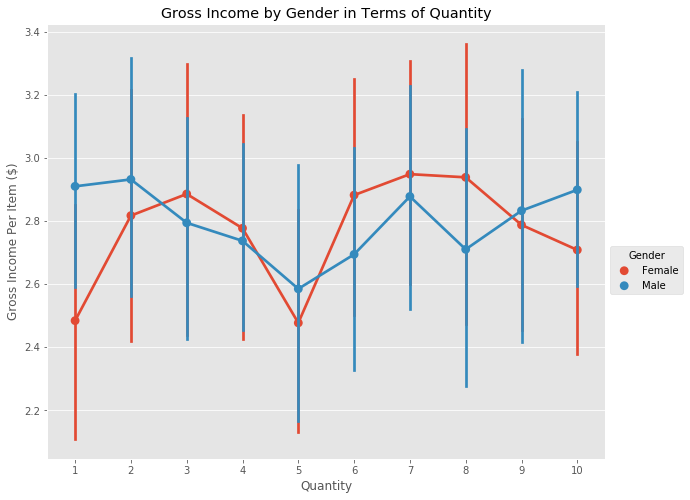

In [400]:
plt.figure(figsize=(10,8))

ax = sns.pointplot(y=(df.gross_income/df.quantity), x=df.quantity, hue=df.gender)
ax.set_ylabel('Gross Income Per Item ($)')
ax.set_xlabel('Quantity')

plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.title('Gross Income by Gender in Terms of Quantity')

plt.savefig(fname='figure1.png', dpi=72, bbox_inches='tight')
plt.show()

The graph shows that male customers generate more gross income per item when buying items at lower quantity. This is most clear at a quantity of 1. On the other hand, female customers tend to generate more gross income per item when buying at higher quantities. Clearly shown at quantities 6, 7, and 8.

### 4.2. How payment method affect gender-specific customer satisfaction?

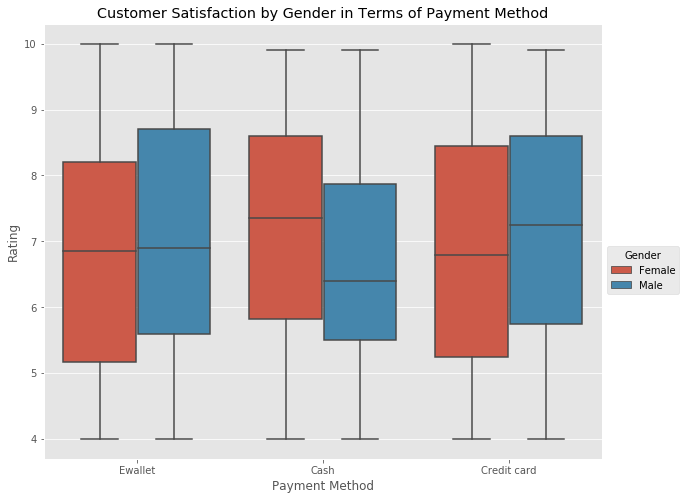

In [401]:
plt.figure(figsize=(10,8))

ax = sns.boxplot(x=df.payment, y=df.rating, hue=df.gender)
ax.set_ylabel('Rating')
ax.set_xlabel('Payment Method')

plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.title('Customer Satisfaction by Gender in Terms of Payment Method')

plt.savefig(fname='figure2.png', dpi=72, bbox_inches='tight')
plt.show()

The graph shows that male customers tend to give higher satisfaction ratings for shopping experience when they pay using e-wallets or credit cards. Female customers, contrarily, tend to give higher satisfaction ratings for shopping experience when paying in cash.

### 4.3. What day of the week on which certain product lines generate more gross income?

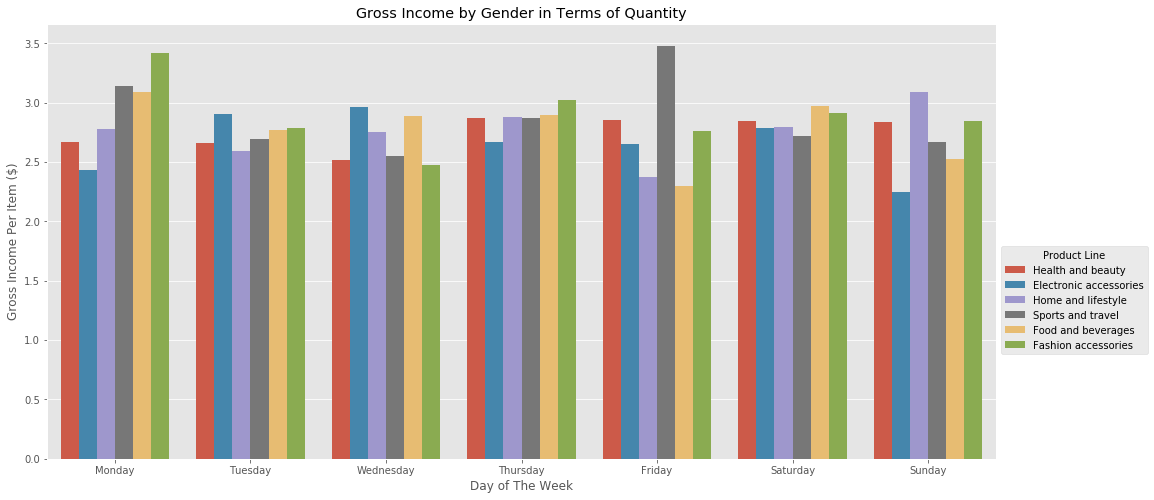

In [402]:
plt.figure(figsize=(17,8))

ax = sns.barplot(y=(df.gross_income/df.quantity), x=df.datetime.dt.dayofweek, hue=df.product_line, ci=False)
ax.set_ylabel('Gross Income Per Item ($)')
ax.set_xlabel('Day of The Week')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.legend(title='Product Line', loc='upper left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.title('Gross Income by Gender in Terms of Quantity')

plt.savefig(fname='figure3.png', dpi=72, bbox_inches='tight')
plt.show()

The graph shows that best gross income per item on Mondays and Thursdays are _fashion accessories_ items, on Tuesdays and Wednesdays are _electronic accessories_ items, on Fridays are_sports and travel_ items, on Saturdays are _food and beverages_ items, and on Sundays are _home and lifestyle_ items. 

The graph also shows some interesting trends. For example, there is a significant increase in gross income per item on Fridays for _sport and travel_. Fridays also happen to be the worst day of the week for _home and lifestyle_ and _food and beverages_ items in terms of gross income per item. This might suggest a relationship between the three that should be investigated further.

## 5. Deployment

Notebook is available on (GitHub)[] and (Kaggle)[]. Blog post is available on (Medium)[].